Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate using the given dataset.csv file.

# Importing required libraries

In [38]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df = pd.read_csv('Unemployment in India.csv')

In [40]:
print('Shape of the dataset :', df.shape)

Shape of the dataset : (768, 7)


In [41]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [42]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [44]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [47]:
df.columns = df.columns.str.strip()
df.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
import datetime as dt

In [50]:
df['year'] = df['Date'].dt.isocalendar().year
df['month'] = df['Date'].dt.month


In [51]:
df = df.dropna()

In [52]:
df.shape

(740, 9)

In [53]:
df['Frequency'].unique()
df = df.drop(['Frequency'],axis = 1)

In [54]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,2019,5.0
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,2019,6.0
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,2019,7.0
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,2019,8.0
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,2019,9.0


# Data Analysis (EDA) 

<Axes: >

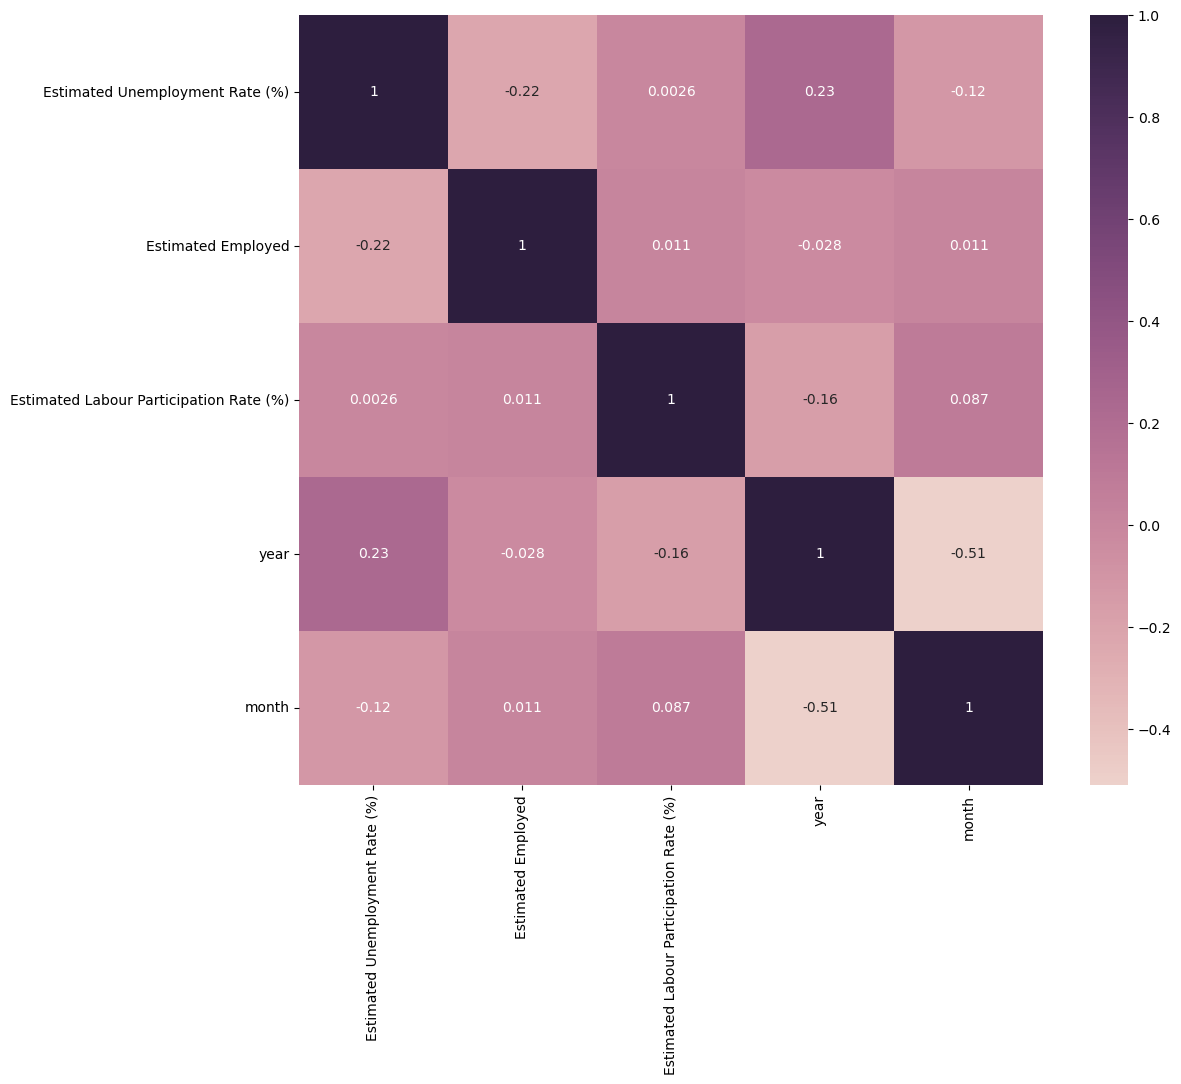

In [55]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True,cmap = sns.cubehelix_palette(as_cmap=True))

In [56]:
count_by_area = df['Area'].value_counts().rename_axis('Area').reset_index(name="Count")
count_by_area.sort_values(by = 'Count',ascending = False)

,Area,Count
0,Urban,381
1,Rural,359


<Axes: xlabel='Area', ylabel='count'>

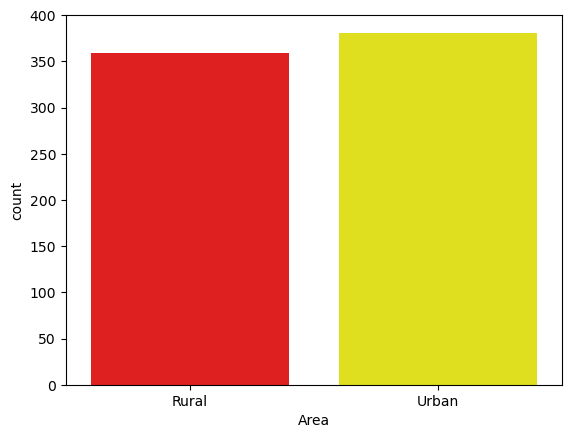

In [57]:
sns.countplot(x='Area', data=df,palette=['red','yellow'])

In [58]:
count_by_region = df["Region"].value_counts().rename_axis('State').reset_index(name='Count')
count_by_region.style.background_gradient(cmap= sns.cubehelix_palette(as_cmap=True))

,State,Count
0,Andhra Pradesh,28
1,Kerala,28
2,West Bengal,28
3,Uttar Pradesh,28
4,Tripura,28
5,Telangana,28
6,Tamil Nadu,28
7,Rajasthan,28
8,Punjab,28
9,Odisha,28


<Axes: xlabel='count', ylabel='Region'>

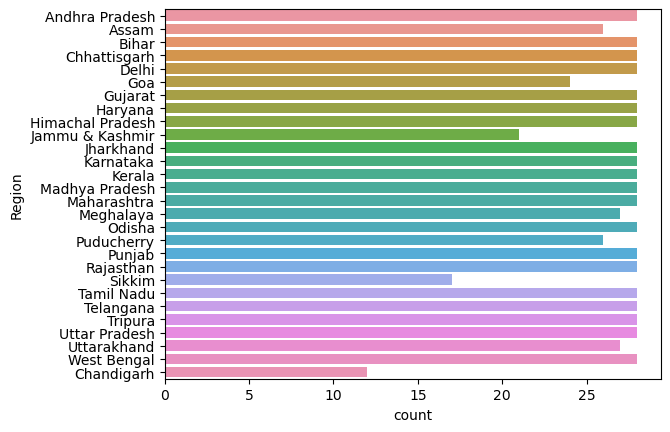

In [59]:
sns.countplot(y='Region',data=df)

<Axes: title={'center': 'Unemployment Rate based on Area'}, xlabel='Estimated Unemployment Rate (%)', ylabel='Region'>

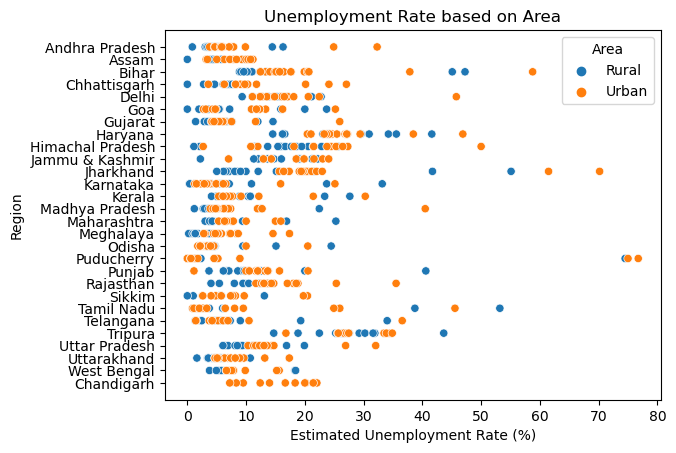

In [60]:
plt.title("Unemployment Rate based on Area")
sns.scatterplot(y=df['Region'],x=df['Estimated Unemployment Rate (%)'],hue = df['Area'])

<Axes: title={'center': 'States with High Unemployment Rate'}, xlabel='Estimated Unemployment Rate (%)', ylabel='Region'>

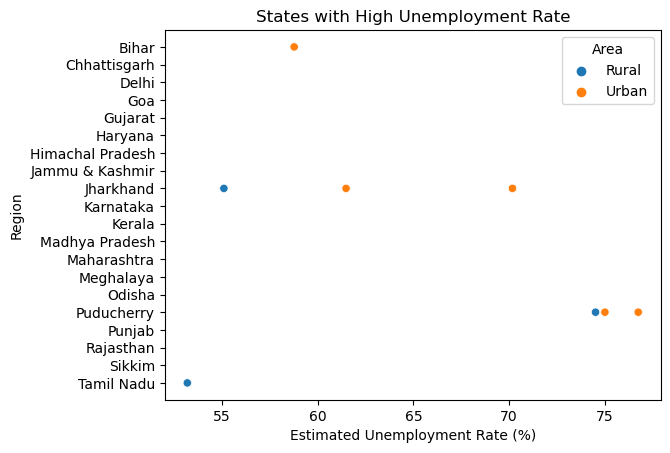

In [61]:
plt.title('States with High Unemployment Rate')
df1=df[df['Estimated Unemployment Rate (%)']>50]
sns.scatterplot(y=df['Region'],x=df1['Estimated Unemployment Rate (%)'],hue=df['Area'])